##### FIR FILTER DESIGN (LOW PASS AND HIGH PASS)


##### DATE: 24/11/2023

##### AIM: 
Write a program to design
1) FIR Low Pass Filter
2) FIR High Pass Filter



##### SOFTWARE USED:
Python

##### THEORY:
FIR is a filter whose impulse response is of finite period; as a result of it settles to zero in finite time. The design methods of FIR filter based on approximation of ideal filter. The ensuing filter approaches the perfect characteristic because the order of the filter will increase, so creating the filter and its implementation additional complicated.

The design process starts with necessities and specifications the FIR filter. The method used in the design process of the filter depends upon the implementation and specifications. There are many advantages and disadvantages of the design methods. Thus, it is very significant to elect the right method for FIR filter design. Due to efficiency and simplicity of the FIR filter, most commonly window method is used.

The filter design can be defined as; it is the process of choosing the length and coefficients of the filter. The intention is to set the parameters so that the required parameters like a stop band and pass band will give the result from running the filter. The easy way of FIR filter design is to truncate the impulse response of an IIR filter. If hd(n) is the impulse response of the desired IIR filter, then an FIR filter with the impulse response h(n) is obtained as: In general h(n) can be thought of as being formed by the product of hd(n) and a suitable ‘window function’ w(n) as follows:

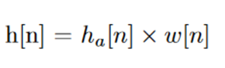

In the case of equation (1) the window function is a rectangular window and is defined as:

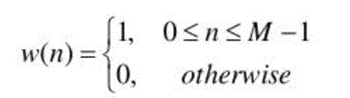

If we let H(ejω ), Hd(ejω ), w(ejω ) represent the Fourier transforms of h(n),hd(n) and,w(n) respectively, then the frequency response of the H(e jω ) of the resulting filter is given by:

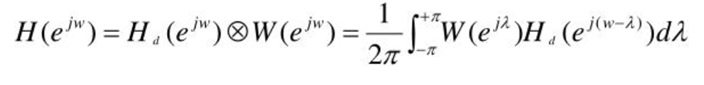

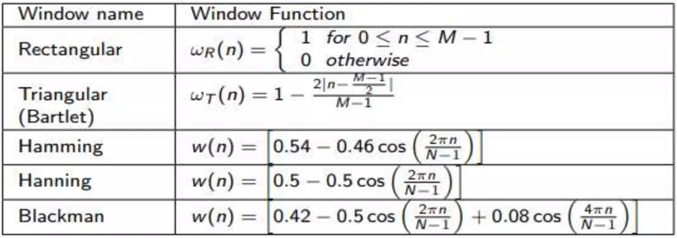


##### CODE:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

In [2]:
def hanning(n, N):
    x = (1-np.cos(2*np.pi*n/(N-1)))/2
    return x

def hamming(n,N):
    x = 0.54-0.46*np.cos(2*np.pi*n/(N-1))
    return x
def mfreq(b):
    w,h = sp.freqz(b,1)
    db = 20*np.log10(abs(h))
    plt.subplot(2,1,1)
    plt.plot(w,db)
    plt.subplot(2,1,2)
    hphase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w,hphase)
    plt.show()

In [3]:
def lpf(N, wc, win):
    a=(N-1)/2
    h=[wc/np.pi if i == a else np.sin(wc*(i-a))/((i-a)*np.pi) for i in np.arange(0, N) ]
    windows = [hanning, hamming]
    h_ = h*windows[win-1](np.arange(0, N), N)

    mfreq(h_)

Enter N: 100
Enter wc: 1
Choose window
1. Hanning
2. Hamming
1


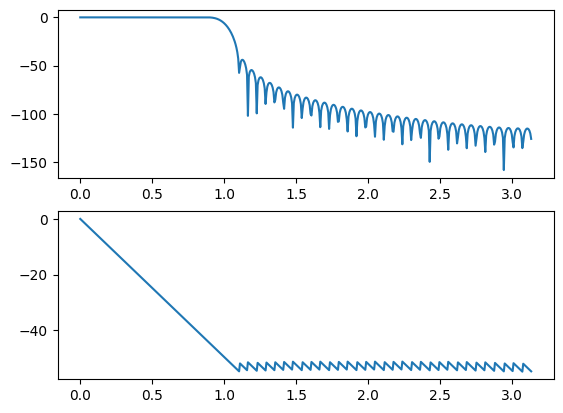

In [6]:
N = int(input("Enter N: "))
wc = float(input("Enter wc: "))
win = int(input("Choose window\n1. Hanning\n2. Hamming\n"))
lpf(N, wc, win)

Enter N: 100
Enter wc: 1
Choose window
1. Hanning
2. Hamming
1


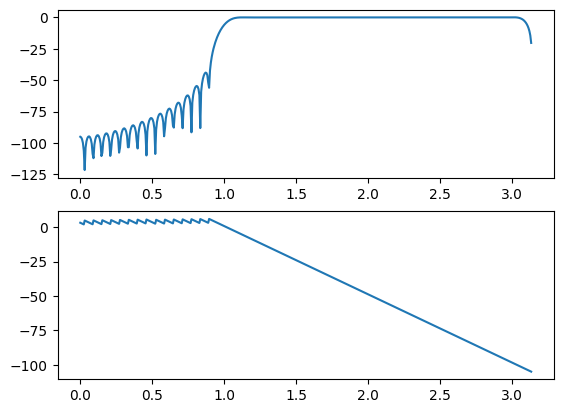

In [7]:
def hpf(N, wc, win):
    a=(N-1)/2
    h=[wc/np.pi if i == a else (np.sin((i-a)*np.pi)-np.sin((i-a)*wc))/(np.pi*(i-a)) for i in np.arange(0, N) ]
    windows = [hanning, hamming]
    h_ = h*windows[win-1](np.arange(0, N), N)

    mfreq(h_)

N = int(input("Enter N: "))
wc = float(input("Enter wc: "))
win = int(input("Choose window\n1. Hanning\n2. Hamming\n"))

hpf(N, wc, win)